# Plotting Results of Segmentation Experiments

This notebook is used to plot the graphs reported in this study.

In [1]:
import matplotlib.pyplot as plt
from matplotlib import style, lines, markers
from cycler import cycler
import numpy as np
import seaborn as sns
import pandas as pd
import itertools

from scipy.stats import ttest_rel, ttest_ind, entropy

In [2]:
# Overriding styles for plots
sns.set_style('whitegrid')

plt.rcParams['axes.grid'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.left'] = False

In [3]:
def addlabels(ax, text_color='black'):
    for rect in ax.patches:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height-5, round(height, 1),
            ha='center', va='bottom', rotation=90, fontsize=12, color=text_color, backgroundcolor=(1, 1, 1, 0.5))

def add_hatches(ax, num_unique):
    hatches = itertools.cycle(['///', '--', '...','\///', 'xxx', '\\\\'])
    for i, bar in enumerate(ax.patches):
        if i % num_unique == 0:
            hatch = next(hatches)
        bar.set_hatch(hatch)
        bar.set_ec('0.2')


## Majority Vote Algorithm Variants for MULTICUE

In [4]:
def plot_weight_types_seaborn(data, y_lim):
    g = sns.catplot(
        data=data, kind="bar",
        x="Model", y="Score", hue="Weight Type",
        errorbar="sd", palette="muted", alpha=.8, height=5, aspect=1.5, legend=False
    )
    g.despine(left=True)
    g.set_axis_labels("", "")
    g.ax.set_ylim(y_lim)
    addlabels(g.ax)
    add_hatches(g.ax, data.nunique()["Model"])
    g.tight_layout()
    g.fig.legend(title = 'Weight type', loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=4, fancybox=True, shadow=True)

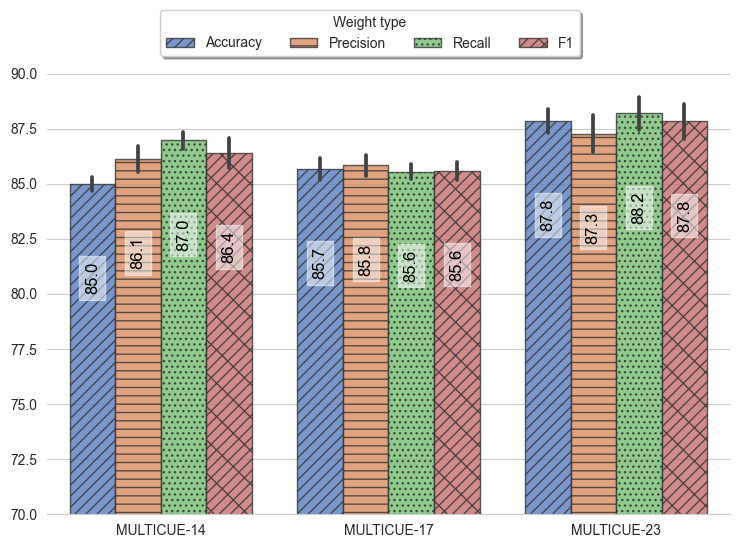

In [5]:

multi14_acc_boundary = [0.8472, 0.8503, 0.8521, 0.8468, 0.8444, 0.8511, 0.8486, 0.85, 0.8521, 0.8561]
multi14_prec_boundary = [0.8561, 0.8565, 0.8578, 0.8564, 0.8635, 0.8671, 0.8565, 0.872, 0.8583, 0.8681]
multi14_rec_boundary = [0.872, 0.8706, 0.8742, 0.8675, 0.8628, 0.8685, 0.868, 0.8658, 0.8747, 0.8719]
multi14_f1_boundary = [0.8577, 0.856, 0.86, 0.856, 0.865, 0.8668, 0.8725, 0.8723, 0.8607, 0.8715]

multi17_acc_boundary = [0.8535, 0.8516, 0.8603, 0.8606, 0.857, 0.8667, 0.8602, 0.8525, 0.8528, 0.8521]
multi17_prec_boundary = [0.8576, 0.8539, 0.8612, 0.8626, 0.8592, 0.8668, 0.8611, 0.8538, 0.8541, 0.8528]
multi17_rec_boundary = [0.854, 0.8521, 0.8579, 0.8574, 0.8574, 0.8619, 0.8581, 0.8522, 0.8519, 0.8523]
multi17_f1_boundary = [0.8553, 0.8527, 0.8582, 0.8587, 0.8577, 0.8629, 0.8585, 0.8527, 0.8509, 0.8509]

multi21_acc_boundary = [0.8736, 0.8766, 0.8825, 0.8826, 0.8726, 0.8737, 0.8827, 0.8715, 0.883, 0.8858]
multi21_prec_boundary = [0.8659, 0.875, 0.8608, 0.8791, 0.8786, 0.8824, 0.867, 0.8677, 0.8653, 0.8849]
multi21_rec_boundary = [0.8848, 0.8754, 0.8884, 0.8753, 0.8735, 0.8793, 0.8868, 0.8735, 0.8882, 0.8942]
multi21_f1_boundary = [0.8709, 0.8823, 0.8664, 0.8837, 0.8828, 0.8867, 0.8797, 0.8711, 0.8706, 0.8883]

acc_weights = [multi14_acc_boundary, multi17_acc_boundary, multi21_acc_boundary]
prec_weights = [multi14_prec_boundary, multi17_prec_boundary, multi21_prec_boundary]
rec_weights = [multi14_rec_boundary, multi17_rec_boundary, multi21_rec_boundary]
f1_weights = [multi14_f1_boundary, multi17_f1_boundary, multi21_f1_boundary]
weights = np.array([acc_weights, prec_weights, rec_weights, f1_weights])
weights = weights * 100

columns = ['Weight Type', 'Model', 'Score']
weight_types = ['Accuracy', 'Precision', 'Recall', 'F1']
model_types = ['MULTICUE-14', 'MULTICUE-17', 'MULTICUE-23']

m, n, r = weights.shape
weight_type_column = np.repeat(np.repeat(weight_types, n), r)
model_type_column = np.repeat(np.tile(model_types, m), r)

out_arr = np.column_stack((weight_type_column, model_type_column, weights.reshape(-1)))
boundary_scores = pd.DataFrame(out_arr, columns=columns)
boundary_scores = boundary_scores.astype({'Score' : float})

plot_weight_types_seaborn(boundary_scores, [70,90])


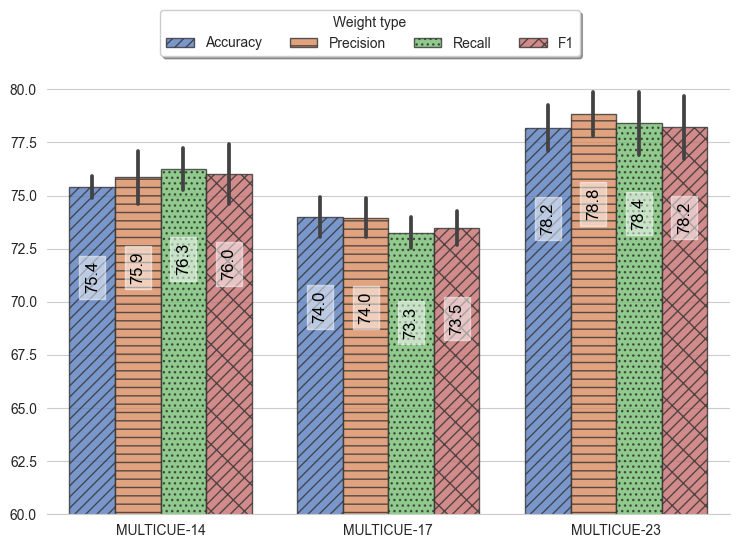

In [8]:
multi14_word = pd.DataFrame(np.array([[0.7519, 0.7529, 0.7584, 0.7492, 0.7462, 0.7542, 0.7528, 0.7528, 0.7558, 0.7653],
                                    [0.7488, 0.7476, 0.7543, 0.7484, 0.7639, 0.7682, 0.7487, 0.7796, 0.7496, 0.7767],
                                    [0.7652, 0.7664, 0.7725, 0.7535, 0.7465, 0.7606, 0.7698, 0.748, 0.7717, 0.7709],
                                    [0.7482, 0.7446, 0.7536, 0.7429, 0.7636, 0.7642, 0.7783, 0.7775, 0.7508, 0.7773]]).T*100, columns=weight_types).assign(Model='MULTICUE-14')

multi17_word = pd.DataFrame(np.array([[0.7359, 0.729, 0.7458, 0.751, 0.7421, 0.7569, 0.744, 0.7325, 0.7319, 0.7303],
                                    [0.7384, 0.7298, 0.744, 0.7497, 0.7411, 0.7566, 0.7437, 0.731, 0.7322, 0.7297],
                                    [0.7293, 0.7241, 0.7358, 0.7379, 0.7362, 0.7467, 0.7369, 0.7261, 0.7259, 0.7262],
                                    [0.7339, 0.7265, 0.7381, 0.7423, 0.7374, 0.7496, 0.7387, 0.7286, 0.726, 0.7251]]).T*100, columns=weight_types).assign(Model='MULTICUE-17')

multi21_word = pd.DataFrame(np.array([[0.7737, 0.7788, 0.7895, 0.7897, 0.7713, 0.7692, 0.7908, 0.7669, 0.7893, 0.797],
                                    [0.7764, 0.7886, 0.7945, 0.7955, 0.7767, 0.7914, 0.7951, 0.7701, 0.794, 0.8019],
                                    [0.7913, 0.7702, 0.7964, 0.7709, 0.7688, 0.7764, 0.795, 0.7674, 0.7963, 0.8075],
                                    [0.7687, 0.7894, 0.7621, 0.7919, 0.7924, 0.7959, 0.7876, 0.7658, 0.765, 0.8015]]).T*100, columns=weight_types).assign(Model='MULTICUE-23')

word_fscores = pd.concat([multi14_word, multi17_word, multi21_word])
word_fscores = pd.melt(word_fscores, id_vars=['Model'], var_name=['Weight Type'], value_name='Score')

plot_weight_types_seaborn(word_fscores, [60,81])

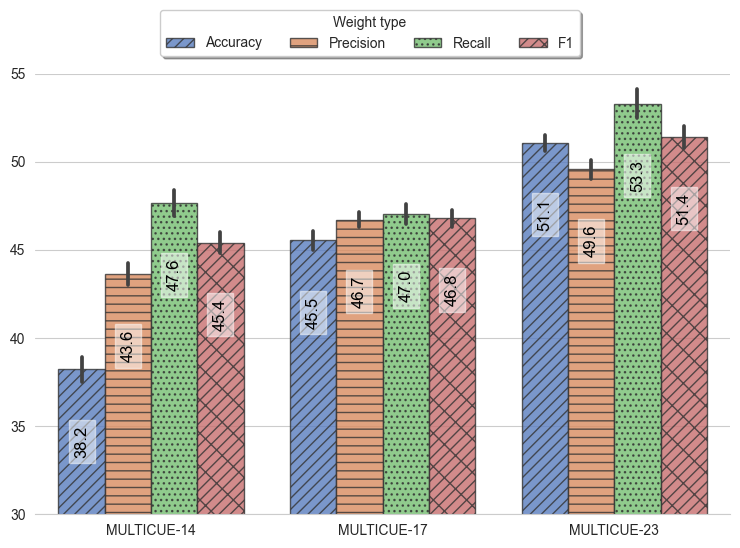

In [9]:
multi14_lex = pd.DataFrame(np.array([[0.3837, 0.3858, 0.3821, 0.3737, 0.3706, 0.3845, 0.3747, 0.3851, 0.3871, 0.3945],
                                    [0.4419, 0.4421, 0.4254, 0.4389, 0.4303, 0.4363, 0.4294, 0.4345, 0.4435, 0.44],
                                    [0.4699, 0.4712, 0.4782, 0.4893, 0.4638, 0.479, 0.4721, 0.4802, 0.4779, 0.4833],
                                    [0.4586, 0.454, 0.4519, 0.4547, 0.4432, 0.4587, 0.4448, 0.4555, 0.4567, 0.4633]]).T*100, columns=weight_types).assign(Model='MULTICUE-14')

multi17_lex = pd.DataFrame(np.array([[0.4467, 0.4537, 0.4606, 0.4515, 0.4583, 0.4645, 0.4587, 0.4518, 0.453, 0.4548],
                                    [0.4656, 0.4674, 0.4722, 0.4622, 0.4694, 0.4748, 0.4693, 0.4639, 0.4647, 0.4612],
                                    [0.4678, 0.4735, 0.4729, 0.4623, 0.4761, 0.4792, 0.4758, 0.4656, 0.4668, 0.4636],
                                    [0.4672, 0.4748, 0.4696, 0.4624, 0.4715, 0.4737, 0.4708, 0.4627, 0.4653, 0.4615]]).T*100, columns=weight_types).assign(Model='MULTICUE-17')

multi22_lex = pd.DataFrame(np.array([[0.5147, 0.5042, 0.517, 0.515, 0.508, 0.5116, 0.5044, 0.5134, 0.5072, 0.5119],
                                    [0.4984, 0.494, 0.4916, 0.4954, 0.489, 0.4973, 0.4915, 0.5014, 0.4919, 0.5069],
                                    [0.5296, 0.5281, 0.5429, 0.5459, 0.5196, 0.5336, 0.5372, 0.5271, 0.5256, 0.539],
                                    [0.5149, 0.5107, 0.5043, 0.5218, 0.5106, 0.5178, 0.5101, 0.52, 0.5088, 0.5218]]).T*100, columns=weight_types).assign(Model='MULTICUE-23')

lex_scores = pd.concat([multi14_lex, multi17_lex, multi22_lex])
lex_scores = pd.melt(lex_scores, id_vars=['Model'], var_name=['Weight Type'], value_name='Score')

plot_weight_types_seaborn(lex_scores, [30,55])

## Comparing MULTICUE to DYMULTI for different values of alpha

In [10]:
def plot_multicue_types_seaborn(data, y_lim):
    g = sns.catplot(
        data=data, kind="bar",
        x="Cues", y="Score", hue="Model",
        errorbar="sd", palette="muted", alpha=.8, height=5, aspect=1.5, legend=False
    )
    g.despine(left=True)
    g.set_axis_labels('Set of Indicators', '')
    g.ax.set_ylim(y_lim)
    addlabels(g.ax)
    add_hatches(g.ax, data.nunique()["Cues"])
    g.tight_layout()
    g.fig.legend(title = 'Model', loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=4, fancybox=True, shadow=True)

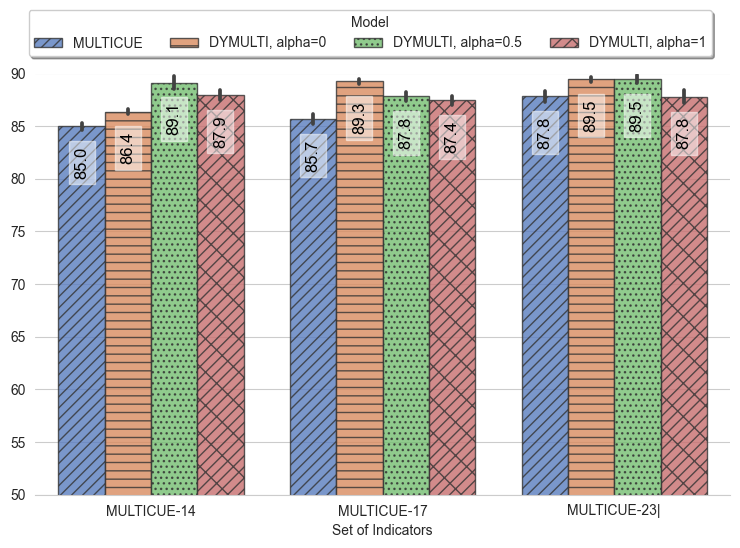

In [11]:
multicue_columns = ["MULTICUE", "DYMULTI, alpha=0", "DYMULTI, alpha=0.5", "DYMULTI, alpha=1"]
multi14_boundary = pd.DataFrame(np.array([[0.8472, 0.8503, 0.8521, 0.8468, 0.8444, 0.8511, 0.8486, 0.85, 0.8521, 0.8561],
                                        [0.8619, 0.8607, 0.866, 0.8604, 0.8654, 0.8631, 0.8641, 0.8642, 0.8682, 0.8645],
                                        [0.8876, 0.8851, 0.8991, 0.8909, 0.8856, 0.8985, 0.8883, 0.8981, 0.8836, 0.8951],
                                        [0.8778, 0.878, 0.8852, 0.8833, 0.8804, 0.8826, 0.8744, 0.8806, 0.8699, 0.8827]]).T*100, columns=multicue_columns).assign(Cues='MULTICUE-14')

multi17_boundary = pd.DataFrame(np.array([[0.8535, 0.8516, 0.8603, 0.8606, 0.857, 0.8667, 0.8602, 0.8525, 0.8528, 0.8521],
                                        [0.8913, 0.8915, 0.8941, 0.893, 0.896, 0.8964, 0.8928, 0.8914, 0.89, 0.8888],
                                        [0.88, 0.8728, 0.8869, 0.8789, 0.8805, 0.8798, 0.8762, 0.8788, 0.8738, 0.8742],
                                        [0.8811, 0.8701, 0.8798, 0.8771, 0.8758, 0.8734, 0.8725, 0.8771, 0.8697, 0.8679]]).T*100, columns=multicue_columns).assign(Cues='MULTICUE-17')

multi22_boundary = pd.DataFrame(np.array([[0.8736, 0.8766, 0.8825, 0.8826, 0.8726, 0.8737, 0.8827, 0.8715, 0.883, 0.8858],
                                        [0.8951, 0.8917, 0.8921, 0.8953, 0.8917, 0.8942, 0.8944, 0.896, 0.8976, 0.8973],
                                        [0.8929, 0.89, 0.8982, 0.8948, 0.8978, 0.8967, 0.891, 0.896, 0.8908, 0.9003],
                                        [0.8758, 0.8793, 0.8707, 0.8809, 0.8879, 0.8817, 0.8712, 0.8762, 0.8711, 0.8845]]).T*100, columns=multicue_columns).assign(Cues='MULTICUE-23|')

multicue_boundary_scores = pd.concat([multi14_boundary, multi17_boundary, multi22_boundary])
multicue_boundary_scores = pd.melt(multicue_boundary_scores, id_vars=['Cues'], var_name=['Model'], value_name='Score')

plot_multicue_types_seaborn(multicue_boundary_scores, [50,90])

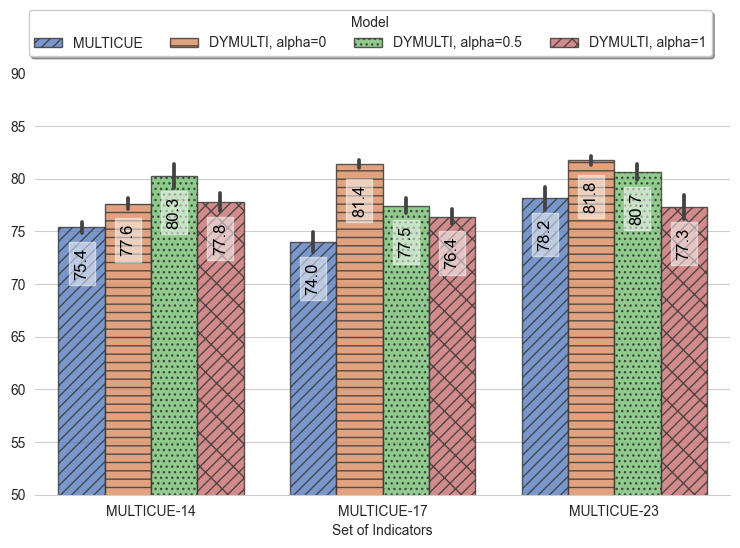

In [12]:
multi14_word = pd.DataFrame(np.array([[0.7519, 0.7529, 0.7584, 0.7492, 0.7462, 0.7542, 0.7528, 0.7528, 0.7558, 0.7653],
                                    [0.7753, 0.7682, 0.7801, 0.77, 0.7815, 0.7719, 0.778, 0.7764, 0.7826, 0.78],
                                    [0.7976, 0.7915, 0.8161, 0.8019, 0.7898, 0.8143, 0.7963, 0.8159, 0.7897, 0.8122],
                                    [0.7745, 0.7781, 0.7879, 0.7855, 0.7788, 0.781, 0.7678, 0.7826, 0.7592, 0.7855]]).T*100, columns=multicue_columns).assign(Cues='MULTICUE-14')

multi17_word = pd.DataFrame(np.array([[0.7359, 0.729, 0.7458, 0.751, 0.7421, 0.7569, 0.744, 0.7325, 0.7319, 0.7303],
                                    [0.8133, 0.8107, 0.8158, 0.8159, 0.8197, 0.8213, 0.8126, 0.8118, 0.8114, 0.8087],
                                    [0.7762, 0.7669, 0.7902, 0.7765, 0.778, 0.7781, 0.7705, 0.7766, 0.7664, 0.7671],
                                    [0.7749, 0.7578, 0.7712, 0.7708, 0.7656, 0.7627, 0.7576, 0.77, 0.7564, 0.7538]]).T*100, columns=multicue_columns).assign(Cues='MULTICUE-17')

multi22_word = pd.DataFrame(np.array([[0.7737, 0.7788, 0.7895, 0.7897, 0.7713, 0.7692, 0.7908, 0.7669, 0.7893, 0.797],
                                    [0.8223, 0.8123, 0.814, 0.8182, 0.813, 0.8153, 0.8162, 0.8203, 0.8222, 0.824],
                                    [0.8029, 0.7968, 0.815, 0.8047, 0.8124, 0.8091, 0.7976, 0.8086, 0.7993, 0.8191],
                                    [0.77, 0.7784, 0.7599, 0.7789, 0.7939, 0.7762, 0.7613, 0.7697, 0.7602, 0.7855]]).T*100, columns=multicue_columns).assign(Cues='MULTICUE-23')

multicue_word_scores = pd.concat([multi14_word, multi17_word, multi22_word])
multicue_word_scores = pd.melt(multicue_word_scores, id_vars=['Cues'], var_name=['Model'], value_name='Score')

plot_multicue_types_seaborn(multicue_word_scores, [50,90])

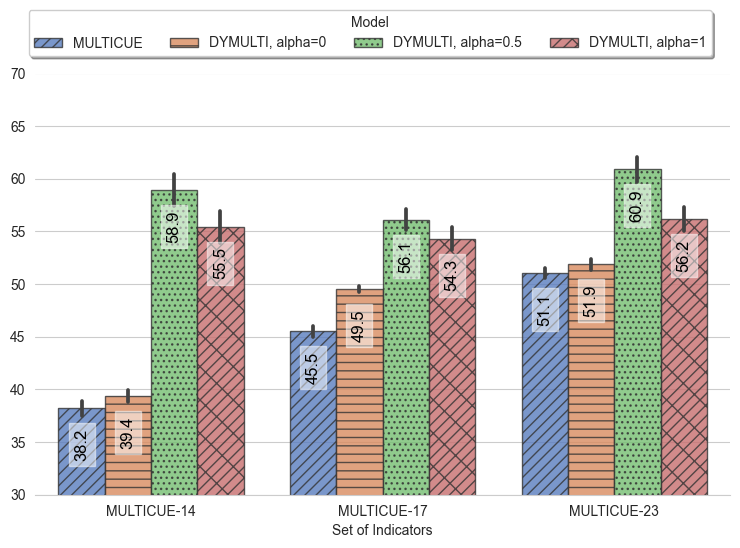

In [13]:
multi14_lex = pd.DataFrame(np.array([[0.3837, 0.3858, 0.3821, 0.3737, 0.3706, 0.3845, 0.3747, 0.3851, 0.3871, 0.3945],
                                    [0.3972, 0.3918, 0.3853, 0.3899, 0.3867, 0.399, 0.3957, 0.3965, 0.4021, 0.3912],
                                    [0.5713, 0.5819, 0.6171, 0.5934, 0.5753, 0.5906, 0.5827, 0.6095, 0.5782, 0.5934],
                                    [0.5419, 0.5446, 0.5788, 0.5795, 0.552, 0.5553, 0.539, 0.5621, 0.5388, 0.5531]]).T*100, columns=multicue_columns).assign(Cues='MULTICUE-14')

multi17_lex = pd.DataFrame(np.array([[0.4467, 0.4537, 0.4606, 0.4515, 0.4583, 0.4645, 0.4587, 0.4518, 0.453, 0.4548],
                                    [0.4933, 0.4956, 0.4954, 0.4927, 0.4975, 0.5023, 0.4958, 0.4932, 0.4914, 0.4948],
                                    [0.5594, 0.5469, 0.5753, 0.5679, 0.5685, 0.5717, 0.5582, 0.5588, 0.5459, 0.558],
                                    [0.5534, 0.5249, 0.5525, 0.5563, 0.5508, 0.5492, 0.5357, 0.5438, 0.53, 0.5365]]).T*100, columns=multicue_columns).assign(Cues='MULTICUE-17')

multi22_lex = pd.DataFrame(np.array([[0.5147, 0.5042, 0.517, 0.515, 0.508, 0.5116, 0.5044, 0.5134, 0.5072, 0.5119],
                                    [0.5234, 0.5159, 0.5208, 0.5202, 0.5092, 0.5237, 0.5126, 0.5211, 0.5167, 0.5242],
                                    [0.6009, 0.5967, 0.6335, 0.61, 0.6113, 0.6102, 0.591, 0.6162, 0.6031, 0.617],
                                    [0.5541, 0.5644, 0.554, 0.5839, 0.5674, 0.563, 0.5436, 0.5658, 0.5506, 0.5699]]).T*100, columns=multicue_columns).assign(Cues='MULTICUE-23')

multicue_lex_scores = pd.concat([multi14_lex, multi17_lex, multi22_lex])
multicue_lex_scores = pd.melt(multicue_lex_scores, id_vars=['Cues'], var_name=['Model'], value_name='Score')

plot_multicue_types_seaborn(multicue_lex_scores, [30,70])

## Comparing PHOCUS-1 to PHOCUS-1S

In [14]:
phocus1s_boundary = [0.8378, 0.868, 0.8484, 0.8558, 0.8393, 0.8605, 0.8634, 0.8543, 0.8302, 0.8479]
phocus1s_word = [0.727, 0.7815, 0.7509, 0.7579, 0.7381, 0.7665, 0.7707, 0.7676, 0.7176, 0.7503]
phocus1s_lex = [0.5711, 0.578, 0.579, 0.5907, 0.5758, 0.5923, 0.5835, 0.6023, 0.5719, 0.5788]
phocus1s_over = [0.02966, 0.02987, 0.02683, 0.02768, 0.03304, 0.02675, 0.03572, 0.03551, 0.02928, 0.02678]

phocus_1_boundary = [0.8072, 0.8248, 0.8238, 0.835, 0.8155, 0.8218, 0.8044, 0.8161, 0.7766, 0.8222]
phocus_1_word = [0.6588, 0.6986, 0.6958, 0.7116, 0.6852, 0.6935, 0.6596, 0.6949, 0.6194, 0.6986]
phocus_1_lex = [0.497, 0.4989, 0.5172, 0.5274, 0.5026, 0.4928, 0.4998, 0.51, 0.5005, 0.5148]
phocus_1_over = [0.06247, 0.06335, 0.04615, 0.04898, 0.06059, 0.05827, 0.07642, 0.06737, 0.07447, 0.05375]

In [15]:
def do_test(a, b):
    scores = ttest_rel(a, b)
    pvalue = "{:.2g}".format(scores.pvalue)
    if "e" in pvalue:
        pvalue = "\\num{" + pvalue + "}"
    print("{:.1f} & {}".format(scores.statistic, pvalue), end=" & ")

print("\nPHOCUS-1 vs PHOCUS-1S & ", end="")
do_test(phocus1s_boundary, phocus_1_boundary)
do_test(phocus1s_word, phocus_1_word)
do_test(phocus1s_lex, phocus_1_lex)

print("\nMULTICUE-14 vs DYMULTI-14, $\\alpha= 0$ & ", end="")
do_test(list(multi14_boundary["DYMULTI, alpha=0"]), list(multi14_boundary["MULTICUE"]))
do_test(list(multi14_word["DYMULTI, alpha=0"]), list(multi14_word["MULTICUE"]))
do_test(list(multi14_lex["DYMULTI, alpha=0"]), list(multi14_lex["MULTICUE"]))

print("\nMULTICUE-14 vs DYMULTI-14, $\\alpha= 0.5$ & ", end="")
do_test(list(multi14_boundary["DYMULTI, alpha=0.5"]), list(multi14_boundary["MULTICUE"]))
do_test(list(multi14_word["DYMULTI, alpha=0.5"]), list(multi14_word["MULTICUE"]))
do_test(list(multi14_lex["DYMULTI, alpha=0.5"]), list(multi14_lex["MULTICUE"]))

print("\nMULTICUE-14 vs DYMULTI-14, $\\alpha= 1$ & ", end="")
do_test(list(multi14_boundary["DYMULTI, alpha=1"]), list(multi14_boundary["MULTICUE"]))
do_test(list(multi14_word["DYMULTI, alpha=1"]), list(multi14_word["MULTICUE"]))
do_test(list(multi14_lex["DYMULTI, alpha=1"]), list(multi14_lex["MULTICUE"]))

print("\nMULTICUE-17 vs DYMULTI-17 , $\\alpha= 0$ & ", end="")
do_test(list(multi17_boundary["DYMULTI, alpha=0"]), list(multi17_boundary["MULTICUE"]))
do_test(list(multi17_word["DYMULTI, alpha=0"]), list(multi17_word["MULTICUE"]))
do_test(list(multi17_lex["DYMULTI, alpha=0"]), list(multi17_lex["MULTICUE"]))

print("\nMULTICUE-17 vs DYMULTI-17 , $\\alpha= 0.5$ & ", end="")
do_test(list(multi17_boundary["DYMULTI, alpha=0.5"]), list(multi17_boundary["MULTICUE"]))
do_test(list(multi17_word["DYMULTI, alpha=0.5"]), list(multi17_word["MULTICUE"]))
do_test(list(multi17_lex["DYMULTI, alpha=0.5"]), list(multi17_lex["MULTICUE"]))

print("\nMULTICUE-17 vs DYMULTI-17 , $\\alpha= 1$ & ", end="")
do_test(list(multi17_boundary["DYMULTI, alpha=1"]), list(multi17_boundary["MULTICUE"]))
do_test(list(multi17_word["DYMULTI, alpha=1"]), list(multi17_word["MULTICUE"]))
do_test(list(multi17_lex["DYMULTI, alpha=1"]), list(multi17_lex["MULTICUE"]))

print("\nMULTICUE-23 vs DYMULTI-23, $\\alpha= 0$ & ", end="")
do_test(list(multi22_boundary["DYMULTI, alpha=0"]), list(multi22_boundary["MULTICUE"]))
do_test(list(multi22_word["DYMULTI, alpha=0"]), list(multi22_word["MULTICUE"]))
do_test(list(multi22_lex["DYMULTI, alpha=0"]), list(multi22_lex["MULTICUE"]))

print("\nMULTICUE-23 vs DYMULTI-23, $\\alpha= 0.5$ & ", end="")
do_test(list(multi22_boundary["DYMULTI, alpha=0.5"]), list(multi22_boundary["MULTICUE"]))
do_test(list(multi22_word["DYMULTI, alpha=0.5"]), list(multi22_word["MULTICUE"]))
do_test(list(multi22_lex["DYMULTI, alpha=0.5"]), list(multi22_lex["MULTICUE"]))

print("\nMULTICUE-23 vs DYMULTI-23, $\\alpha= 1$ & ", end="")
do_test(list(multi22_boundary["DYMULTI, alpha=1"]), list(multi22_boundary["MULTICUE"]))
do_test(list(multi22_word["DYMULTI, alpha=1"]), list(multi22_word["MULTICUE"]))
do_test(list(multi22_lex["DYMULTI, alpha=1"]), list(multi22_lex["MULTICUE"]))


PHOCUS-1 vs PHOCUS-1S & 8.6 & \num{1.2e-05} & 10.6 & \num{2.2e-06} & 19.2 & \num{1.3e-08} & 
MULTICUE-14 vs DYMULTI-14, $\alpha= 0$ & 13.0 & \num{4e-07} & 11.7 & \num{9.5e-07} & 4.9 & 0.00081 & 
MULTICUE-14 vs DYMULTI-14, $\alpha= 0.5$ & 23.8 & \num{1.9e-09} & 16.1 & \num{6.1e-08} & 43.2 & \num{9.5e-12} & 
MULTICUE-14 vs DYMULTI-14, $\alpha= 1$ & 17.0 & \num{3.8e-08} & 8.0 & \num{2.2e-05} & 30.5 & \num{2.2e-10} & 
MULTICUE-17 vs DYMULTI-17 , $\alpha= 0$ & 32.9 & \num{1.1e-10} & 36.0 & \num{4.8e-11} & 39.0 & \num{2.4e-11} & 
MULTICUE-17 vs DYMULTI-17 , $\alpha= 0.5$ & 14.8 & \num{1.3e-07} & 13.9 & \num{2.2e-07} & 39.8 & \num{2e-11} & 
MULTICUE-17 vs DYMULTI-17 , $\alpha= 1$ & 9.6 & \num{5e-06} & 7.7 & \num{3.1e-05} & 23.5 & \num{2.2e-09} & 
MULTICUE-23 vs DYMULTI-23, $\alpha= 0$ & 10.2 & \num{3.1e-06} & 10.9 & \num{1.8e-06} & 6.9 & \num{7.4e-05} & 
MULTICUE-23 vs DYMULTI-23, $\alpha= 0.5$ & 8.1 & \num{1.9e-05} & 6.1 & 0.00017 & 33.9 & \num{8.4e-11} & 
MULTICUE-23 vs DYMULTI-23, $\alpha

## Plotting Learning Rates

In [16]:
from wordseg import evaluate, utils

import codecs

In [17]:
measures = ["token_precision", "token_recall", "token_fscore", "type_precision", "type_recall", "type_fscore", "boundary_noedge_precision", "boundary_noedge_recall", "boundary_noedge_fscore", "oversegmentation", "undersegmentation"]

In [18]:
def get_boundaries(utt, prepared_utt):
    # prepared_utt is space-separated phonemes (e.g 'ab c d e')
    # utt is segmented utterance (e.g. 'abc de')
    # does not return utterance boundaries
    boundaries = []
    phones = prepared_utt.strip().split(' ')
    n = len(utt)
    i = 0
    for phone in phones:
        i += len(phone)
        if i >= n:
            break
        if utt[i] == ' ':
            boundaries.append(True)
            i += 1
        else:
            boundaries.append(False)
    return boundaries

def get_overundersegmentations(text, gold, prepared):
    """ Calculates undersegmentation and oversegmentation """
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for (text_utt, gold_utt, prepared_utt) in zip(text, gold, prepared):
        text_boundaries = get_boundaries(text_utt, prepared_utt)
        gold_boundaries = get_boundaries(gold_utt, prepared_utt)
        for i, b in enumerate(text_boundaries):
            if b and gold_boundaries[i]:
                tp += 1
            if b and not gold_boundaries[i]:
                fp += 1
            if not b and gold_boundaries[i]:
                fn += 1
            if not b and not gold_boundaries[i]:
                tn += 1
    overseg = fp / (fp + tn) if (fp + tn) != 0 else 0
    underseg = fn / (fn + tp) if (fn + tp) != 0 else 0
    return (overseg, underseg)

In [19]:
def get_learning_rate(foldername, model_name, interval=200):
    # Get data
    l = len(evaluate._load_text(codecs.open(foldername+"/gold.txt", 'r', encoding='utf8')))
    indices = [i for i in range(0, l, interval)]
    frames = []
    for i in indices:
        results = {}
        for measure in measures:
            results[measure] = []
        j = l if (l - i < interval) else i+interval
        for n in range(1,11):
            gold = evaluate._load_text(codecs.open(foldername+"/gold{}.txt".format(n), 'r', encoding='utf8'))
            text = evaluate._load_text(codecs.open(foldername+"/segmented{}.txt".format(n), 'r', encoding='utf8'))
            prepared = evaluate._load_text(codecs.open(foldername+"/prepared{}.txt".format(n), 'r', encoding='utf8'))
            evals = evaluate.evaluate(text[i:j], gold[i:j])
            evals["oversegmentation"], evals["undersegmentation"] = get_overundersegmentations(text[i:j], gold[i:j], prepared[i:j])
            for measure in measures:
                results[measure].append(evals[measure]*100)
        frames.append(pd.DataFrame(results).assign(Timepoint=i))

    return pd.concat(frames).assign(Model=model_name)

In [35]:
mc17 = get_learning_rate('../experiments/A', 'MULTICUE-17')
mc22 = get_learning_rate('../experiments/B', 'MULTICUE-23')
mc14 = get_learning_rate('../experiments/H', 'MULTICUE-14')
p1s = get_learning_rate('../experiments/C', 'PHOCUS-1S')
p1 = get_learning_rate('../experiments/G', 'PHOCUS-1')
dm22_0 = get_learning_rate('../experiments/E', 'DYMULTI-23, alpha=0')
dm22_05 = get_learning_rate('../experiments/D', 'DYMULTI-23, alpha=0.5')
dm22_1 = get_learning_rate('../experiments/F', 'DYMULTI-23, alpha=1')


In [36]:
learning_rates = pd.concat([dm22_0, mc14, mc22, dm22_05, dm22_1, mc22, p1s, mc17, p1])

In [37]:
def plot_learning_rates(data, measure):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax = sns.lineplot(
        data=data, ax=ax,
        x='Timepoint', y=measure, hue='Model', style='Model',
        palette='muted', alpha=1, dashes=True
    )
    ax.set_xlabel('Utterances')
    ax.set_ylabel('')
    ax.set_ylim([30,90])
    #ax.get_legend().set(shadow=True)
    plt.legend(title = 'Model', loc='lower right', fancybox=True, shadow=True)

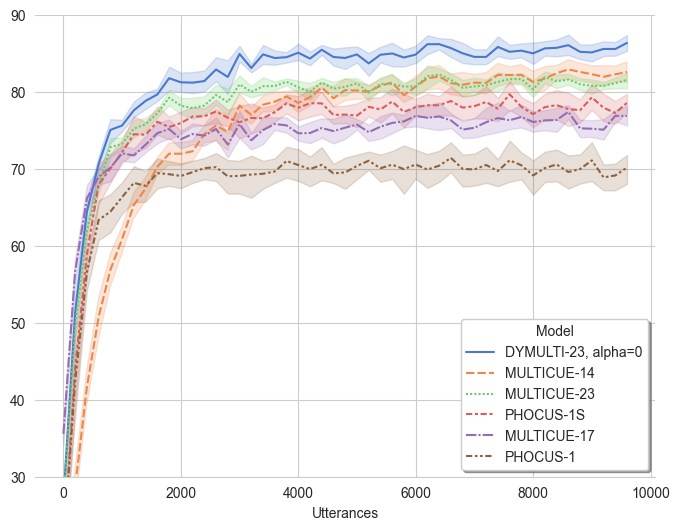

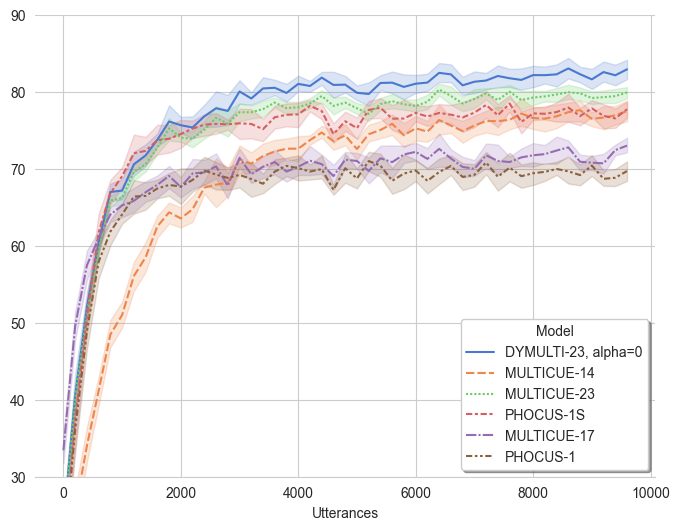

In [38]:
models_of_interest = ['MULTICUE-14', 'MULTICUE-17', 'MULTICUE-23', 'DYMULTI-23, alpha=0', 'PHOCUS-1', 'PHOCUS-1S']
plot_learning_rates(learning_rates[learning_rates['Model'].isin(models_of_interest)], "token_fscore")
plot_learning_rates(learning_rates[learning_rates['Model'].isin(models_of_interest)], "type_fscore")

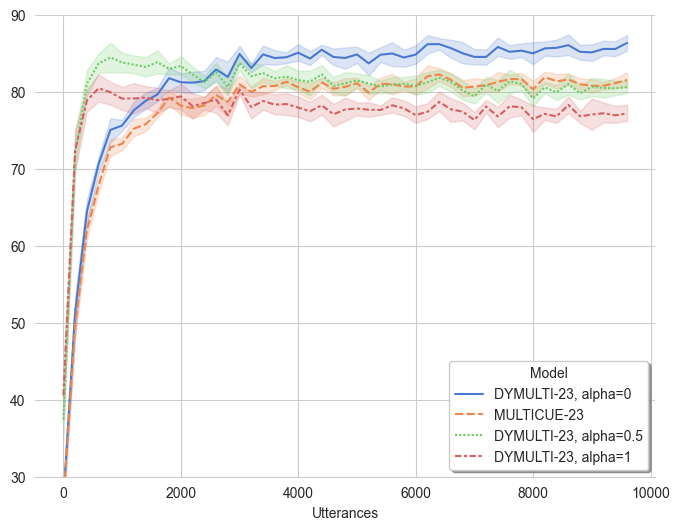

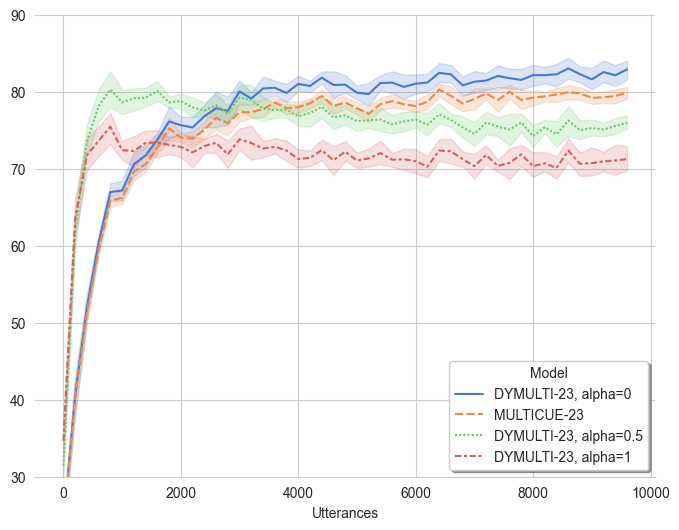

In [39]:
models_of_interest = ['MULTICUE-23', 'DYMULTI-23, alpha=0', 'DYMULTI-23, alpha=0.5', 'DYMULTI-23, alpha=1']
plot_learning_rates(learning_rates[learning_rates['Model'].isin(models_of_interest)], "token_fscore")
plot_learning_rates(learning_rates[learning_rates['Model'].isin(models_of_interest)], "type_fscore")

## Cross-lingual evaluation

In [25]:
language_families = {'Mandarin' : 	'Sinitic',
                    'Danish' : 'Germanic',
                    'Cantonese' : 'Sinitic',
                    'English' : 'Germanic',
                    'Icelandic' : 'Germanic',
                    'German' : 'Germanic',
                    'Norwegian' : 'Germanic',
                    'Irish' : 'Celtic',
                    'Farsi' : 'Indo-Iranian',
                    'Estonian' : 'Coastal Finnic',
                    'Swedish' : 'Germanic',
                    'Greek' : 'Graeco-Phrygian',
                    'Indonesian' : 'Malayo-Sumbawan',
                    'Dutch' : 'Germanic',
                    'Romanian' : 'Italic',
                    'French' : 'Italic',
                    'Croatian' : 'Balto-Slavic',
                    'Hungarian' : 'Hungarian',
                    'Serbian' : 'Balto-Slavic',
                    'Italian' : 'Italic',
                    'Turkish' : 'Oghuz', 
                    'Portuguese' : 'Italic',
                    'Basque': 'Basque',
                    'Spanish' : 'Italic',
                    'Japanese' : 'Japan-Taiwan Japanese',
                    'Korean': 'Koreanic'}

from collections import Counter
family_counts = Counter(language_families.values())
for language in language_families:
    if family_counts[language_families[language]] <= 1:
        language_families[language] = 'Other'

In [26]:
import os
folders = ["../experiments/" + folder for folder in os.listdir("../experiments/") if "L-" in folder]
folders.sort()

def get_scores(foldername, remove_start=0):
    results = {}
    for measure in measures:
        results[measure] = []
    for n in range(1,11):
        gold = evaluate._load_text(codecs.open(foldername+"/gold{}.txt".format(n), 'r', encoding='utf8'))
        text = evaluate._load_text(codecs.open(foldername+"/segmented{}.txt".format(n), 'r', encoding='utf8'))
        prepared = evaluate._load_text(codecs.open(foldername+"/prepared{}.txt".format(n), 'r', encoding='utf8'))
        evals = evaluate.evaluate(text[remove_start:], gold[remove_start:])
        evals["oversegmentation"], evals["undersegmentation"] = get_overundersegmentations(text[remove_start:], gold[remove_start:], prepared[remove_start:])
        for measure in measures:
            results[measure].append(100 * evals[measure])

    return results

def get_unshuffled_score(foldername, remove_start=0):
    gold = evaluate._load_text(codecs.open(foldername+"/gold0.txt", 'r', encoding='utf8'))
    text = evaluate._load_text(codecs.open(foldername+"/segmented0.txt", 'r', encoding='utf8'))
    prepared = evaluate._load_text(codecs.open(foldername+"/prepared0.txt", 'r', encoding='utf8'))
    evals = evaluate.evaluate(text[remove_start:], gold[remove_start:])
    evals["oversegmentation"], evals["undersegmentation"] = get_overundersegmentations(text[remove_start:], gold[remove_start:], prepared[remove_start:])
    for measure in evals:
        evals[measure] = [evals[measure] * 100]
    return evals

def get_multilingual_scores(folders, remove_start, shuffled=True):
    frames = []
    for folder in folders:
        language = folder.split('-')[1]
        if shuffled:
            scores = pd.DataFrame(get_scores(folder, remove_start))
        else:
            scores = pd.DataFrame(get_unshuffled_score(folder, remove_start))
        scores = scores.assign(Language=language)
        scores = scores.assign(Family=language_families[language])
        frames.append(scores)
    return pd.concat(frames)

In [27]:
multicue_scores = get_multilingual_scores([folder for folder in folders if folder[-1] == "M"], 5000).assign(Model="MULTICUE-23")
phocus_scores = get_multilingual_scores([folder for folder in folders if folder[-1] == "P"], 5000).assign(Model="PHOCUS-1S")
dymulti_scores = get_multilingual_scores([folder for folder in folders if folder[-1] == "D"], 5000).assign(Model="DYMULTI-23")
multilingual_scores = pd.concat([multicue_scores, phocus_scores, dymulti_scores])

In [28]:
multicue_scores_unshuffled = get_multilingual_scores([folder for folder in folders if folder[-1] == "M"], 5000, shuffled=False).assign(Model='MULTICUE-23')
phocus_scores_unshuffled = get_multilingual_scores([folder for folder in folders if folder[-1] == "P"], 5000, shuffled=False).assign(Model='PHOCUS-1S')
dymulti_scores_unshuffled = get_multilingual_scores([folder for folder in folders if folder[-1] == "D"], 5000, shuffled=False).assign(Model='DYMULTI-23')
multilingual_scores_unshuffled = pd.concat([multicue_scores_unshuffled, phocus_scores_unshuffled, dymulti_scores_unshuffled])

In [29]:
# Save averages to CSV
multilingual_averages = pd.DataFrame(multilingual_scores.groupby(['Language', 'Model']).mean())
multilingual_averages.to_csv('multilingual_lexicon_averages.csv')

In [33]:
def plot_languages(data, model):
    filtered_data = data[data['Model'] == model].copy()
    filtered_data.rename(columns={'token_fscore' : 'WF', 'type_fscore' : 'LF'}, inplace=True)
    filtered_data = pd.melt(filtered_data, id_vars=['Language', 'Model'], value_vars=['WF', 'LF'], var_name='Score Type', value_name='Score').astype({'Score' : float})
    g = sns.catplot(
        data=filtered_data, kind="bar",
        x='Language', y='Score', hue='Score Type',
        errorbar="sd", palette="muted", alpha=.8, height=6, aspect=1.7, legend=False
    )
    g.despine(left=True)
    g.set_axis_labels('', '')
    add_hatches(g.ax, data.nunique()["Language"])
    g.tick_params(axis='x', rotation=90, bottom=True)
    g.fig.legend(title = 'Score', loc='upper center', bbox_to_anchor=(0.5, 1), ncol=4, fancybox=True, shadow=True)
    g.tight_layout()

def plot_three(data, score, sort=True):
    sorted_data = data.copy().sort_values(by='Language', kind='stable', ascending=True)
    dymulti_means = sorted_data[sorted_data['Model'] == 'DYMULTI-23'].groupby(by='Language').mean()[score].values
    sorted_data['means'] = np.repeat(dymulti_means, data.shape[0]/dymulti_means.shape[0])
    g = sns.catplot(
        data=sorted_data.sort_values(by='means', ascending=True) if sort else data,
        kind="bar",
        x='Language', y=score, hue='Model',
        errorbar="sd", palette="muted", alpha=.8, height=6, aspect=1.9, legend=False
    )
    g.despine(left=True)
    g.set_axis_labels('', '')
    add_hatches(g.ax, data.nunique()["Language"])
    g.tick_params(axis='x', rotation=90, bottom=True)
    g.fig.legend(title = 'Model', loc='upper center', bbox_to_anchor=(0.5, 1), ncol=4, fancybox=True, shadow=True)
    g.tight_layout()

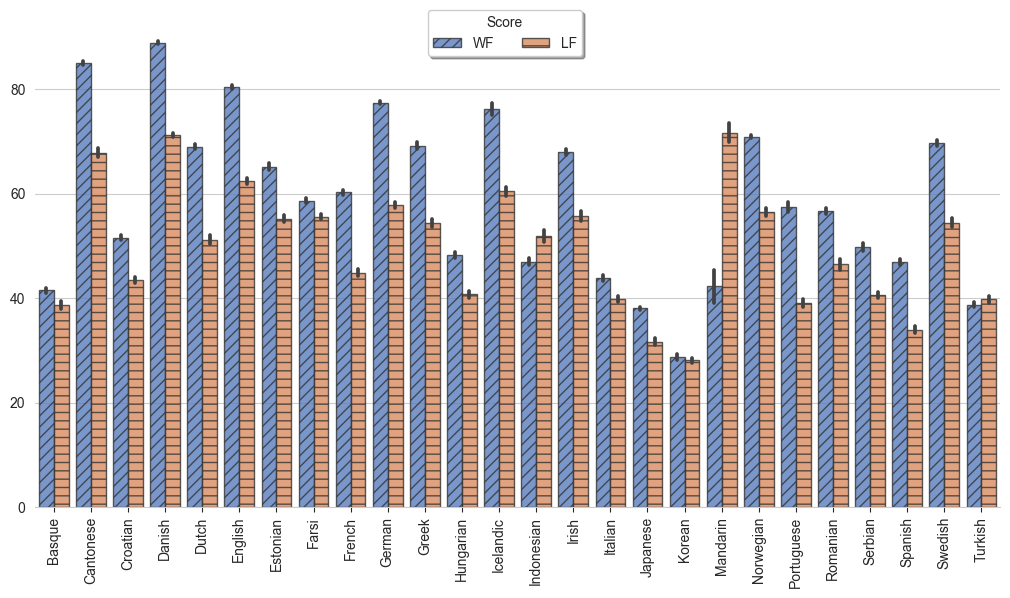

In [34]:
plot_languages(multilingual_scores, 'DYMULTI-23')

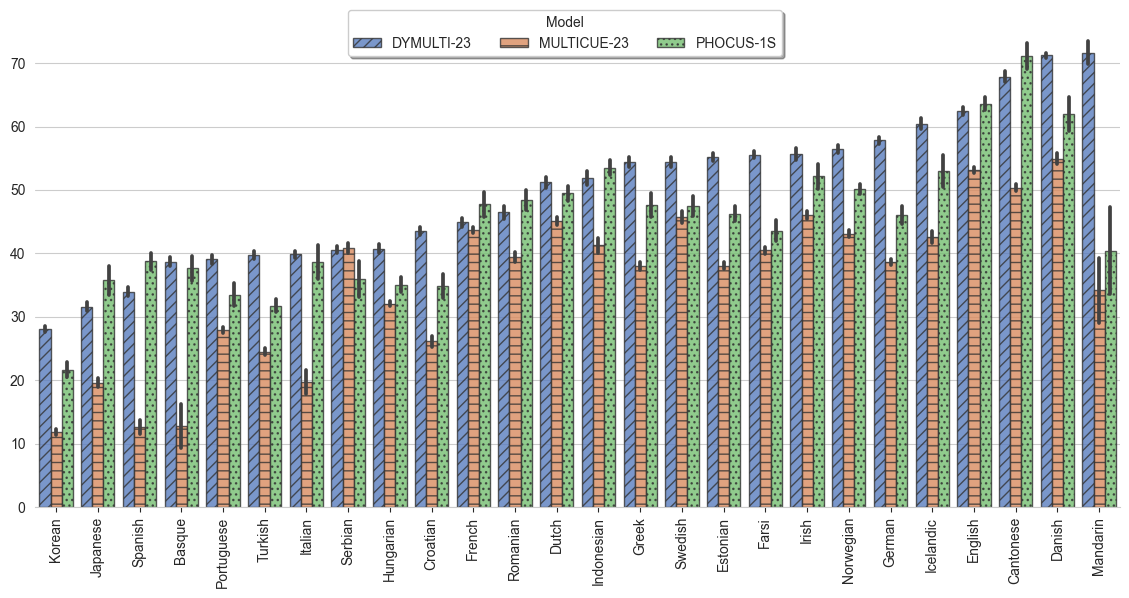

In [40]:
plot_three(multilingual_scores, 'type_fscore')

## Plotting Languages by Family and Entropy

In [ ]:
colors = sns.color_palette('muted', n_colors=5, as_cmap=True)
family_language_map = {'Other' : colors[0], 'Italic' : colors[4], 'Germanic' : colors[3], 'Balto-Slavic' : colors[2], 'Sinitic' : colors[1]}

def plot_families(data, score):
    fig, ax = plt.subplots(figsize=(12, 6))
    sorted_data = data.copy()
    sorted_data['means'] = np.repeat(data.groupby(by='Language').mean()[score].values, 10)
    g = sns.barplot(
        data=sorted_data.sort_values(by='means',ascending=True), ax=ax,
        x='Language', y=score, hue='Family',
        errorbar='sd', palette=family_language_map, alpha=.8, dodge=False)
    sns.despine(ax=ax,left=True)
    ax.set_xlabel('')
    ax.set_ylabel('')
    add_hatches(ax, data.nunique()["Language"])
    ax.tick_params(axis='x', rotation=90, bottom=True)
    ax.legend(title = 'Family', loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3, fancybox=True, shadow=True)

In [ ]:
information_measures = ['Number of Phonemes', 'Entropy 1-gram', 'Entropy 2-gram', 'Entropy 3-gram', 'Entropy 4-gram',
                        'Conditional Entropy 2-gram', 'Conditional Entropy 3-gram', 'Conditional Entropy 4-gram']

def get_entropies(folders):
    keys = information_measures + ['Language', 'Family']
    entropies = {key : [] for key in keys}
    for folder in folders:
        # Get gold utterances
        language = folder.split('-')[1]
        gold_utterances = [line.strip() for line in open(folder+'/gold.txt','r').readlines()]

        # Get counts of phonemes
        phonemes = list(''.join(gold_utterances))
        unique_phonemes, phoneme_counts = np.unique(phonemes, return_counts=True)
        total = sum(phoneme_counts)

        # Get counts of phoneme pairs
        phonemes_2 = list('~'.join(gold_utterances))
        phone_pairs = list(map(lambda x : ''.join(x), filter(lambda x : not '~' in x, zip(phonemes_2[:-1], phonemes_2[1:]))))
        unique_phoneme_pairs, phoneme_pair_counts = np.unique(phone_pairs, return_counts=True, axis=0)

        # Get counts of phoneme triples
        phone_triples = list(map(lambda x : ''.join(x), filter(lambda x : not '~' in x, zip(phonemes_2[:-2], phonemes_2[1:-1], phonemes_2[2:]))))
        unique_phoneme_triples, phoneme_triples_counts = np.unique(phone_triples, return_counts=True, axis=0)

        # Get counts of phoneme 4grams
        phone_4grams = list(map(lambda x : ''.join(x), filter(lambda x : not '~' in x, zip(phonemes_2[:-3], phonemes_2[1:-2], phonemes_2[2:-1], phonemes_2[3:]))))
        unique_phoneme_4grams, phoneme_4gram_counts = np.unique(phone_4grams, return_counts=True, axis=0)

        # Get conditional counts
        conditional_probs = []
        for i, pair in enumerate(unique_phoneme_pairs):
            conditional_probs.append(phoneme_pair_counts[i]/phoneme_counts[np.where(unique_phonemes==pair[0])[0][0]])
        conditional_entropy = -sum([phoneme_pair_counts[i]/total * np.log2(conditional_probs[i]) for i in range(len(conditional_probs))])

        # Get triple conditional counts
        conditional_probs_2 = []
        for i, triple in enumerate(unique_phoneme_triples):
            conditional_probs_2.append(phoneme_triples_counts[i]/phoneme_pair_counts[np.where(unique_phoneme_pairs==triple[0:2])[0][0]])
        conditional_entropy_2 = -sum([phoneme_triples_counts[i]/total * np.log2(conditional_probs_2[i]) for i in range(len(conditional_probs_2))])

        # Get quadruple conditional counts
        conditional_probs_3 = []
        for i, fourgram in enumerate(unique_phoneme_4grams):
            conditional_probs_3.append(phoneme_4gram_counts[i]/phoneme_triples_counts[np.where(unique_phoneme_triples==fourgram[0:3])[0][0]])
        conditional_entropy_3 = -sum([phoneme_4gram_counts[i]/total * np.log2(conditional_probs_3[i]) for i in range(len(conditional_probs_3))])

        entropies["Number of Phonemes"].append(len(unique_phonemes))
        entropies["Entropy 1-gram"].append(entropy(phoneme_counts, base=2))
        entropies["Entropy 2-gram"].append(entropy(phoneme_pair_counts, base=2))
        entropies["Entropy 3-gram"].append(entropy(phoneme_triples_counts, base=2))
        entropies["Entropy 4-gram"].append(entropy(phoneme_4gram_counts, base=2))
        entropies["Conditional Entropy 2-gram"].append(conditional_entropy)
        entropies["Conditional Entropy 3-gram"].append(conditional_entropy_2)
        entropies["Conditional Entropy 4-gram"].append(conditional_entropy_3)
        entropies["Language"].append(language)
        entropies["Family"].append(language_families[language])
    return pd.DataFrame(entropies)

def plot_entropies(data, sort_by, score):
    fig, ax = plt.subplots(figsize=(12, 6))
    g = sns.barplot(
        data=data.sort_values(by=sort_by, ascending=False), ax=ax,
        x='Language', y=score, hue='Family',
        errorbar='sd', palette=family_language_map, alpha=.8, dodge=False)
    sns.despine(ax=ax,left=True)
    ax.set_xlabel('')
    ax.set_ylabel('')
    add_hatches(ax, data.nunique()["Language"])
    ax.tick_params(axis='x', rotation=90, bottom=True)
    ax.legend(title = 'Family', loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, fancybox=True, shadow=True)

def plot_entropies_scatter(data, x, y):
    fig, ax = plt.subplots(figsize=(12, 6))
    g = sns.scatterplot(
        data=data,
        x=x, y=y, hue='Family', style='Family', palette=family_language_map, alpha=.8, s=200)
    sns.despine(ax=ax,left=True)
    ax.set_xlabel('DYMULTI Lexicon F-score', size=14)
    ax.set_ylabel('Conditional Entropy of 3-grams', size=14)
    ax.tick_params(axis='x', bottom=True)
    ax.legend(title = 'Family', loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, fancybox=True, shadow=True)

In [ ]:
dymulti_scores = multilingual_scores[multilingual_scores['Model'] == 'DYMULTI-23']
entropies = get_entropies([folder for folder in folders if folder[-1] == "D"])
mean_scores = dymulti_scores.groupby(by='Language').mean()
entropies['DYMULTI LF'] = mean_scores['type_fscore'].values
entropies['DYMULTI WF'] = mean_scores['token_fscore'].values
entropies['DYMULTI BF'] = mean_scores['boundary_noedge_fscore'].values

entropies_detailed = pd.concat([entropies]*10, ignore_index=True).sort_values(by='Language')
entropies_detailed['DYMULTI LF'] = dymulti_scores['type_fscore'].values
entropies_detailed['DYMULTI WF'] = dymulti_scores['token_fscore'].values
entropies_detailed['DYMULTI BF'] = dymulti_scores['boundary_noedge_fscore'].values

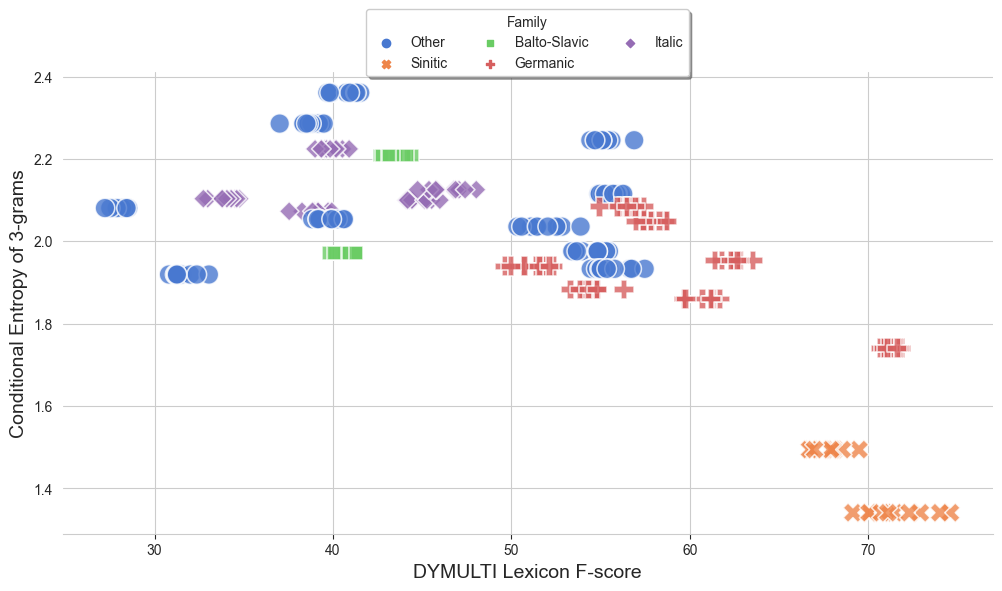

In [ ]:
plot_entropies_scatter(entropies_detailed, x='DYMULTI LF', y='Conditional Entropy 3-gram')

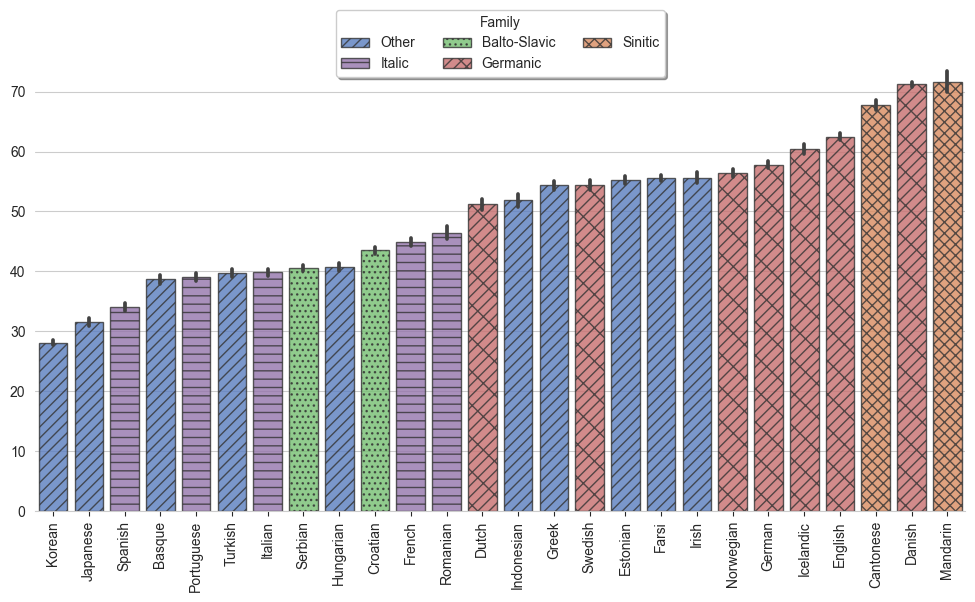

In [ ]:
plot_families(dymulti_scores, 'type_fscore')

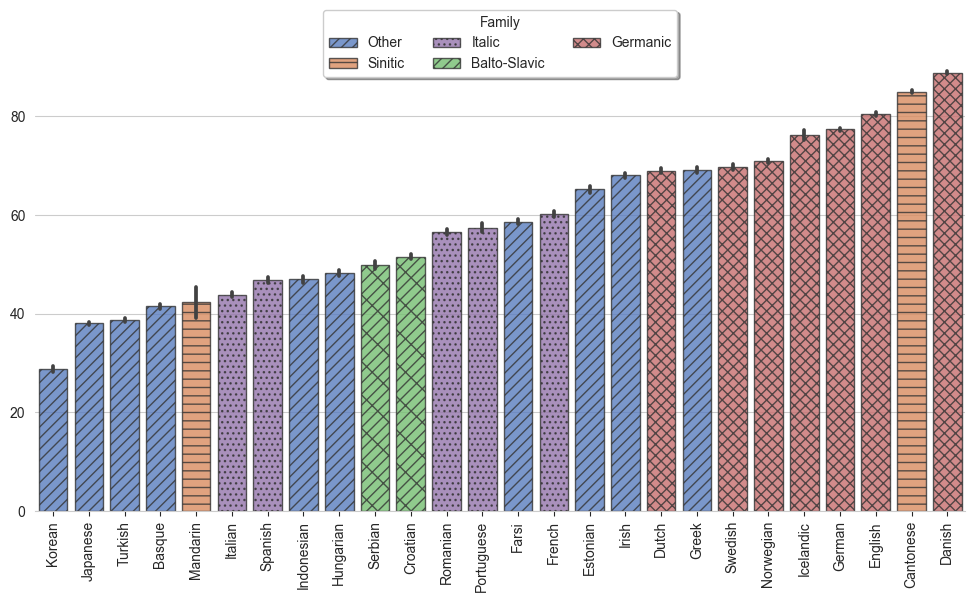

In [ ]:
plot_families(dymulti_scores, 'token_fscore')

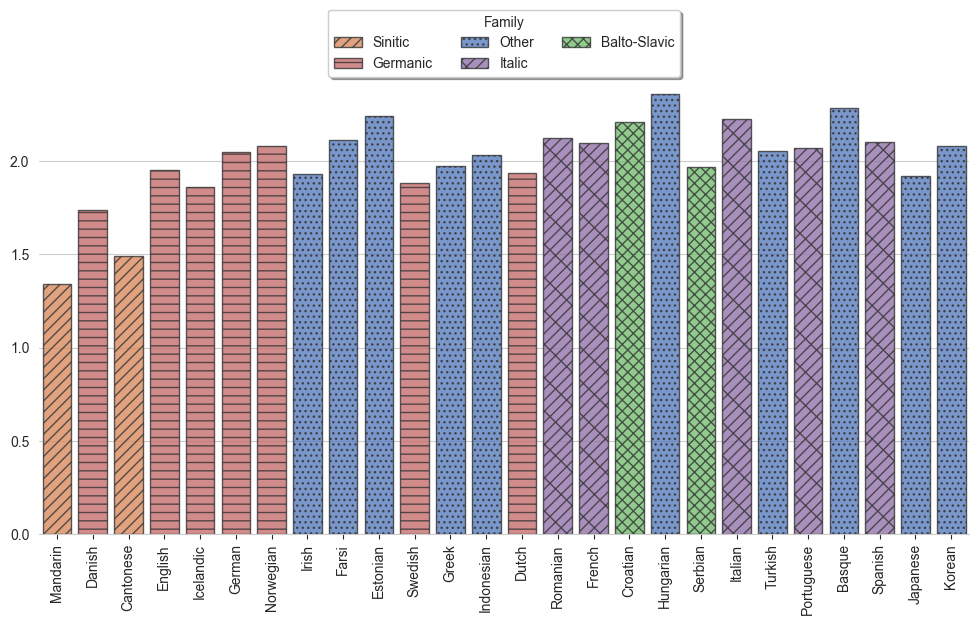

In [ ]:
plot_entropies(entropies, "DYMULTI LF", "Conditional Entropy 3-gram")

<AxesSubplot:xlabel='Information Measure', ylabel='Score'>

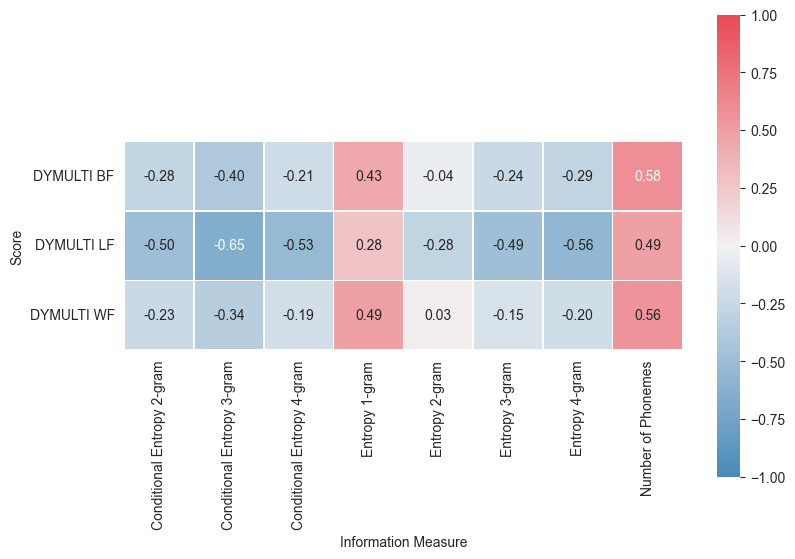

In [ ]:
correlations = {'Score' : [], 'Information Measure' : [], 'Correlation' : []}
for score in ['DYMULTI LF', 'DYMULTI WF', 'DYMULTI BF']:
    for col in information_measures:
        corr = np.corrcoef(entropies[col], entropies[score])[1,0]
        correlations['Score'].append(score)
        correlations['Information Measure'].append(col)
        correlations['Correlation'].append(corr)
correlations = pd.DataFrame(correlations).pivot('Score', 'Information Measure', 'Correlation')

f, ax = plt.subplots(figsize=(9, 6))
cmap = sns.diverging_palette(240, 10, l=55, as_cmap=True)
sns.heatmap(correlations, annot=True, fmt=".2f", linewidths=.5, ax=ax, vmin=-1, vmax=1, square=True, center=0, cmap=cmap)

In [ ]:
# Do t-tests
count = 0
measure = 'type_fscore'
languages = []
for language in pd.unique(multilingual_scores['Language']):
    df = multilingual_scores[multilingual_scores['Language'] == language]
    mc = df[df['Model'] == 'MULTICUE-22'][measure]
    ph = df[df['Model'] == 'PHOCUS-1S'][measure]
    dm = df[df['Model'] == 'DYMULTI-22'][measure]
    _, p1 = ttest_rel(mc, dm)
    _, p2 = ttest_rel(ph, dm)
    if (p1 < 0.001 and ph.mean() < dm.mean()
        and p2 < 0.001 and mc.mean() < dm.mean()):
        count += 1
        languages.append(language)
print('DYMULTI has a significantly higher {} for {} languages: \n{}'.format(measure, count, languages))

DYMULTI has a significantly higher type_fscore for 15 languages: 
['Croatian', 'Danish', 'Estonian', 'Farsi', 'German', 'Greek', 'Hungarian', 'Icelandic', 'Irish', 'Korean', 'Mandarin', 'Norwegian', 'Portuguese', 'Swedish', 'Turkish']


## Transitional Probability Examples

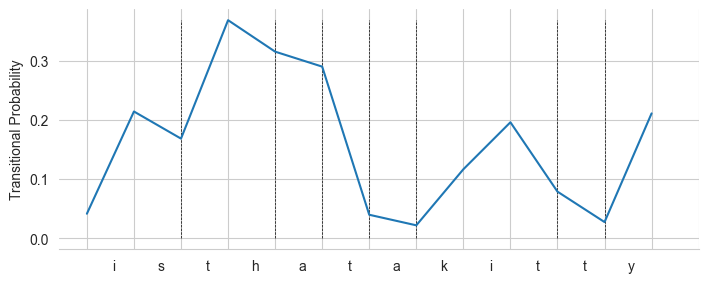

In [43]:
import matplotlib.transforms

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 0.5])

#fig, ax = plt.subplots(figsize=(8, 6))

x = list(' isthatakitty ')
tps = [0.04157303370786517, 0.2140036851803106, 0.1682486022623846, 0.36802721088435375, 0.31495062090544634, 0.28971102521627096, 0.03983371126228269, 0.02199521443033315, 0.11653872993719469, 0.19584101079231378, 0.07883597883597884, 0.027513227513227514, 0.2108118581670219]

ax.plot(list(range(len(tps))), tps)

for i in range(1, len(tps)-1):
    if tps[i] < tps[i-1]:# and tps[i] < tps[i+1]:
        plt.vlines(x = i, ymin = 0, ymax = np.max(tps), colors = 'black', linestyles="dashed", linewidth=0.5) 

ax.set_xticks(list(range(len(tps)+1)))
ax.set_xticklabels(x)

# ax.plot(x, avg_c[measure], label="DYMULTI-21, alpha=0.5", linewidth=1.0)
# ax.fill_between(x, avg_c[measure] - dev_c[measure], avg_c[measure] + dev_c[measure], alpha=0.2)

# ax.plot(x, avg_f[measure], label="DYMULTI-21, alpha=1", linewidth=1.0)
# ax.fill_between(x, avg_f[measure] - dev_f[measure], avg_f[measure] + dev_f[measure], alpha=0.2)

# Plot data
ax.set_ylabel("Transitional Probability")
#ax.set_ylim([50,100])
#ax.legend()

dx = -0.2; dy = 0/72. 
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)



for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)

plt.show()


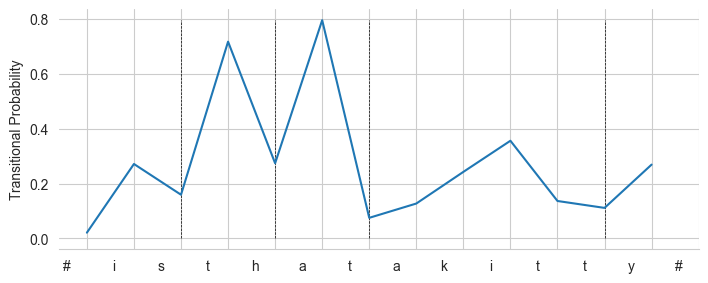

In [43]:
import matplotlib.transforms

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 0.5])

#fig, ax = plt.subplots(figsize=(8, 6))

x = list('#isthatakitty#')
tps = [0.020786516853932586, 0.2714987714987715, 0.15928659286592867, 0.7179289026275116, 0.27418361059765867, 0.7963365414467557, 0.07496823379923762, 0.127134724857685, 0.24267782426778242, 0.3562874251497006, 0.1364247311827957, 0.1112176414189837, 0.2692307692307692]

ax.plot(list(range(len(tps))), tps)

for i in range(1, len(tps)-1):
    if tps[i] < tps[i-1] and tps[i] < tps[i+1]:
        plt.vlines(x = i, ymin = 0, ymax = np.max(tps), colors = 'black', linestyles="dashed", linewidth=0.5) 

ax.set_xticks(list(range(len(tps)+1)))
ax.set_xticklabels(x)

# ax.plot(x, avg_c[measure], label="DYMULTI-21, alpha=0.5", linewidth=1.0)
# ax.fill_between(x, avg_c[measure] - dev_c[measure], avg_c[measure] + dev_c[measure], alpha=0.2)

# ax.plot(x, avg_f[measure], label="DYMULTI-21, alpha=1", linewidth=1.0)
# ax.fill_between(x, avg_f[measure] - dev_f[measure], avg_f[measure] + dev_f[measure], alpha=0.2)

# Plot data
ax.set_ylabel("Transitional Probability")
#ax.set_ylim([50,100])
#ax.legend()

dx = -0.2; dy = 0/72. 
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)



for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)

plt.show()

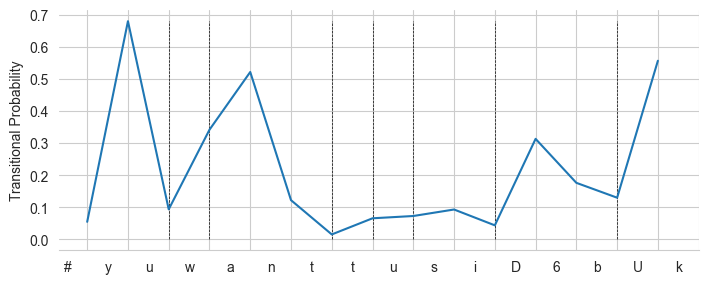

In [44]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 0.5])

x = list('#yuwanttusiD6bUk')
tps = [0.05466334164588529, 0.679521789433089, 0.0935604966791799, 0.34151193633952254, 0.5212694125590817, 0.12207896857373086, 0.015365703749231715, 0.06564228641671789, 0.0727692751949177, 0.09301290609701825, 0.04369890047927826, 0.31304558680892336, 0.1760601180891036, 0.12977498691784406, 0.5563114134542706]

ax.plot(list(range(len(tps))), tps)

for i in range(1, len(tps)-1):
    #if tps[i] < tps[i-1] and tps[i] < tps[i+1]:
    #    plt.vlines(x = i, ymin = 0, ymax = np.max(tps), colors = 'black', linestyles="dashed", linewidth=0.5) 
    #if tps[i] < tps[i-1]:
    #    plt.vlines(x = i, ymin = 0, ymax = np.max(tps), colors = 'black', linestyles="dashed", linewidth=0.5) 
    if tps[i] < tps[i+1]:
        plt.vlines(x = i, ymin = 0, ymax = np.max(tps), colors = 'black', linestyles="dashed", linewidth=0.5) 


ax.set_xticks(list(range(len(tps)+1)))
ax.set_xticklabels(x)

# ax.plot(x, avg_c[measure], label="DYMULTI-21, alpha=0.5", linewidth=1.0)
# ax.fill_between(x, avg_c[measure] - dev_c[measure], avg_c[measure] + dev_c[measure], alpha=0.2)

# ax.plot(x, avg_f[measure], label="DYMULTI-21, alpha=1", linewidth=1.0)
# ax.fill_between(x, avg_f[measure] - dev_f[measure], avg_f[measure] + dev_f[measure], alpha=0.2)

# Plot data
ax.set_ylabel("Transitional Probability")
#ax.set_ylim([50,100])
#ax.legend()

dx = -0.2; dy = 0/72. 
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)

for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)

plt.show()

['#4878D0',
 '#EE854A',
 '#6ACC64',
 '#D65F5F',
 '#956CB4',
 '#8C613C',
 '#DC7EC0',
 '#797979',
 '#D5BB67',
 '#82C6E2']